# Customer Segmentation for E-commerce Using K-Means

In [41]:
# import the essiential libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
# upload the dataset
df = pd.read_csv("/content/Mall_Customers.csv")

In [43]:
# see the first records using head method
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## Perfroming the basic EDA to understand the Data

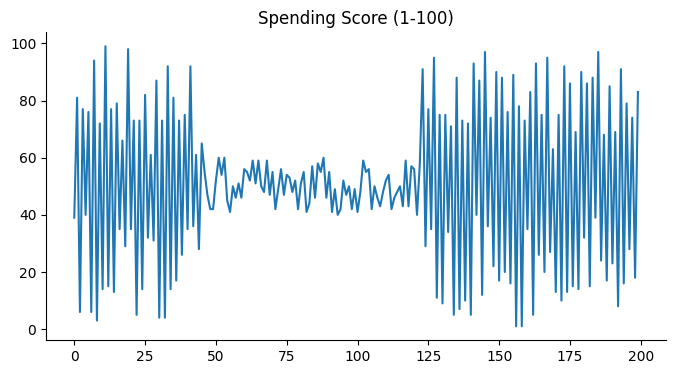

In [45]:
# Spending Score (1-100)

from matplotlib import pyplot as plt
df['Spending Score (1-100)'].plot(kind='line', figsize=(8, 4), title='Spending Score (1-100)')
plt.gca().spines[['top', 'right']].set_visible(False)

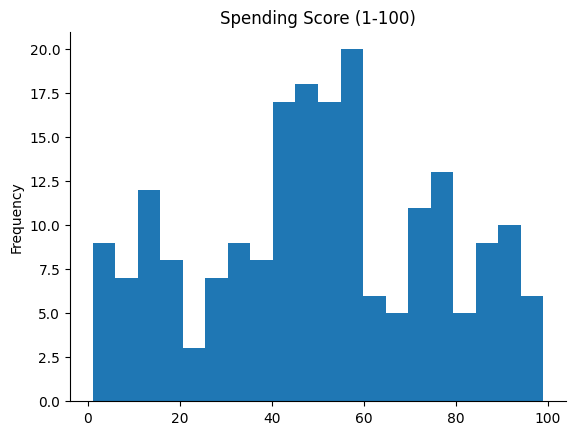

In [46]:
# Spending Score (1-100)

from matplotlib import pyplot as plt
df['Spending Score (1-100)'].plot(kind='hist', bins=20, title='Spending Score (1-100)')
plt.gca().spines[['top', 'right',]].set_visible(False)

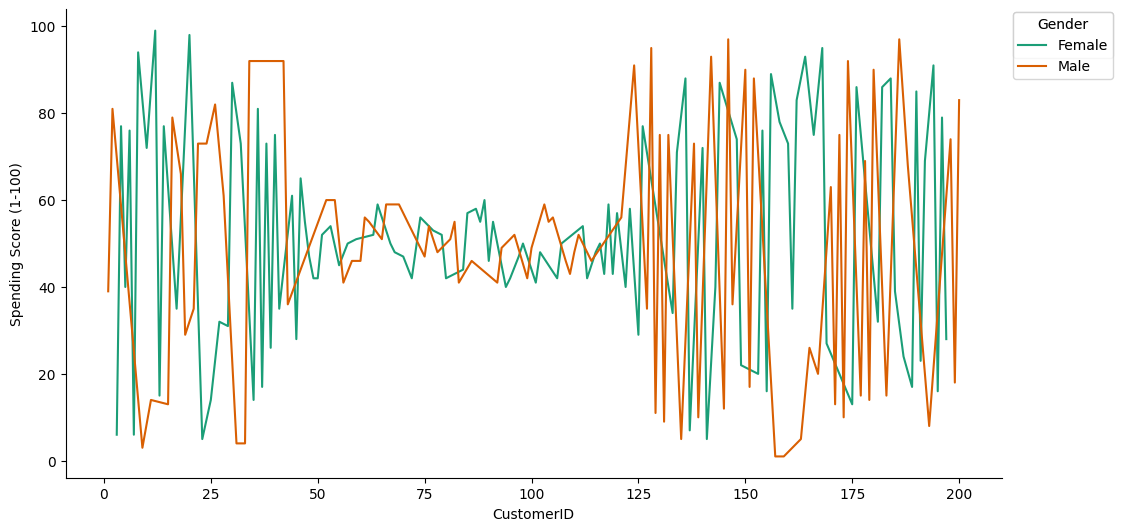

In [47]:
# CustomerID vs Spending Score (1-100)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['CustomerID']
  ys = series['Spending Score (1-100)']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('CustomerID', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Gender')):
  _plot_series(series, series_name, i)
  fig.legend(title='Gender', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('CustomerID')
_ = plt.ylabel('Spending Score (1-100)')

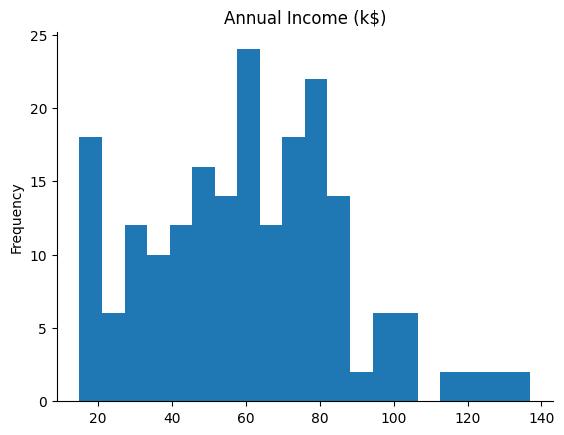

In [48]:
# title Annual Income (k$)

from matplotlib import pyplot as plt
df['Annual Income (k$)'].plot(kind='hist', bins=20, title='Annual Income (k$)')
plt.gca().spines[['top', 'right',]].set_visible(False)

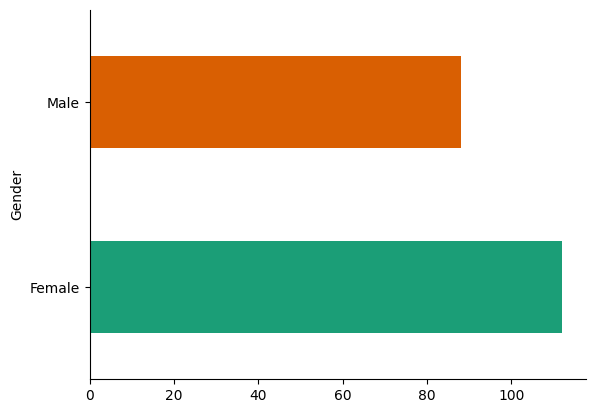

In [49]:
#  Gender

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

### Performing the data prepration

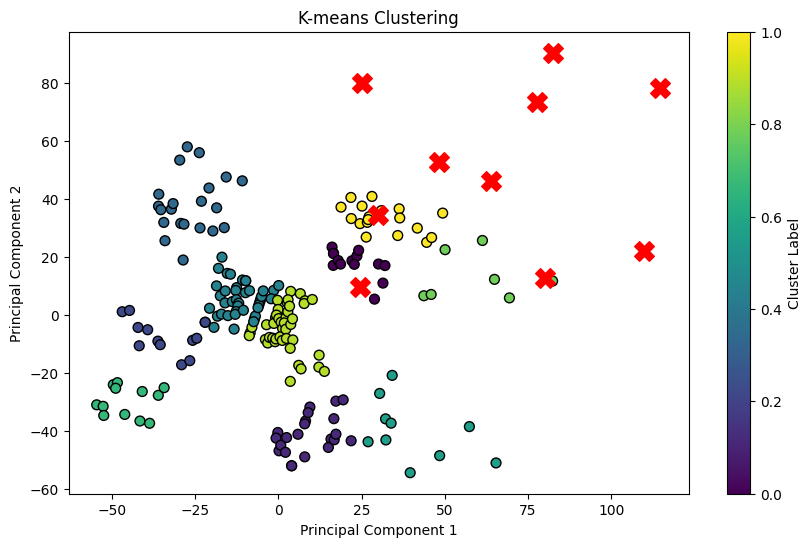

In [50]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming `kmeans` is your fitted KMeans model and `X` is your data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)  # Reduce to 2 dimensions

# Get cluster labels
labels = kmeans.labels_

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200)  # Plot cluster centers
plt.title('K-means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()


In [51]:

# getting the target column
X = df.iloc[:,[3, 4]].values

In [52]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [53]:
from sklearn.cluster import KMeans

wcss = []

In [54]:

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


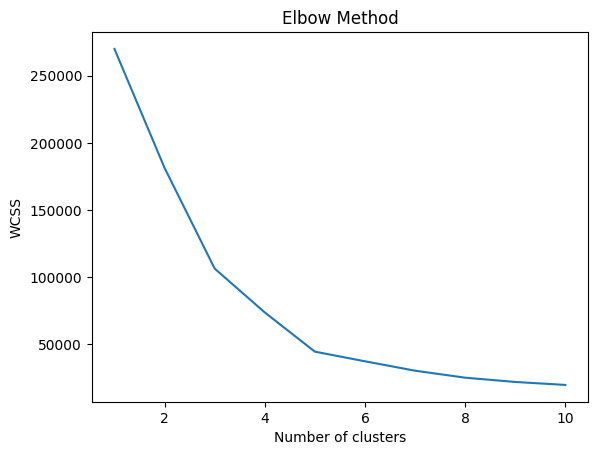

In [55]:
# plot the chart to get the elbow method

import matplotlib.pyplot as plt

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()



In [56]:
kmeansmodel = KMeans(n_clusters= 5, init = 'k-means++',n_init=10, random_state = 0)

In [57]:
y_kmeans = kmeansmodel.fit_predict(X)

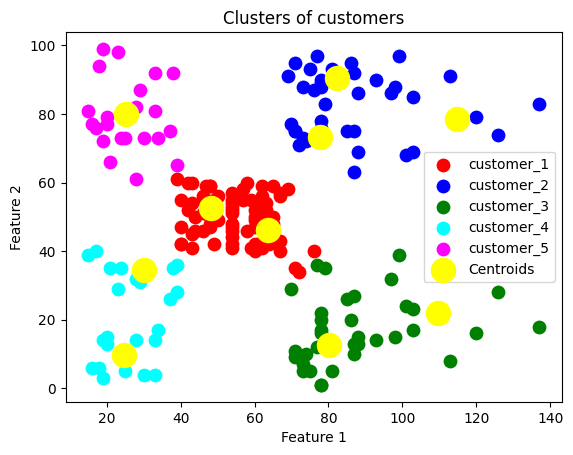

In [58]:
import matplotlib.pyplot as plt

# Assuming y_kmeans is the result of fitting KMeans with the optimal number of clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=80, c='red', label='customer_1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=80, c='blue', label='customer_2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=80, c='green', label='customer_3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=80, c='cyan', label='customer_4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s=80, c='magenta', label='customer_5')

# Centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='yellow', label='Centroids')

plt.title('Clusters of customers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()
